In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn import  metrics
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Porównanie wyników modeli regresji dopasowanych na 2 losowych podziałach ustalonego zbioru danych (czerwone i niebieskie punkty).

In [2]:
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
y = np.vstack(y)
X = np.vstack(X)

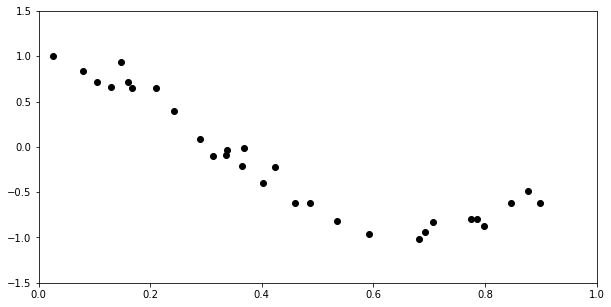

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.scatter(X, y,  color='black')
ax.set_xlim([0,1])
ax.set_ylim([-1.5,1.5])
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18, 1) (18, 1)
(12, 1) (12, 1)


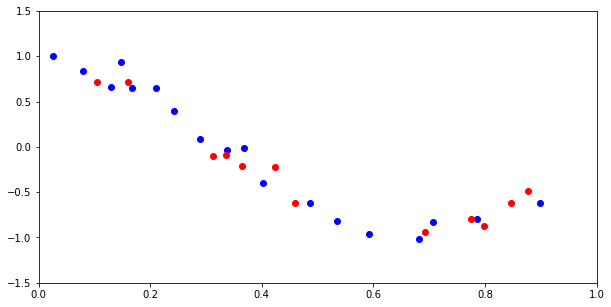

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_test, y_test,  color='red')
ax.set_xlim([0,1])
ax.set_ylim([-1.5,1.5])
plt.show()

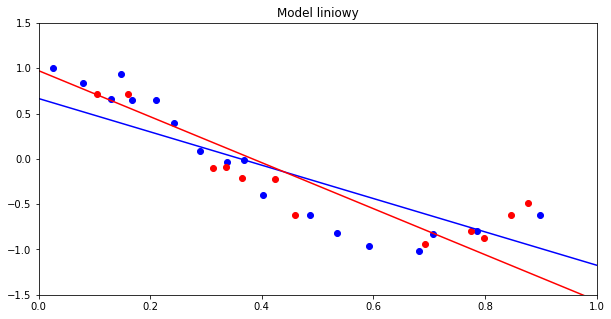

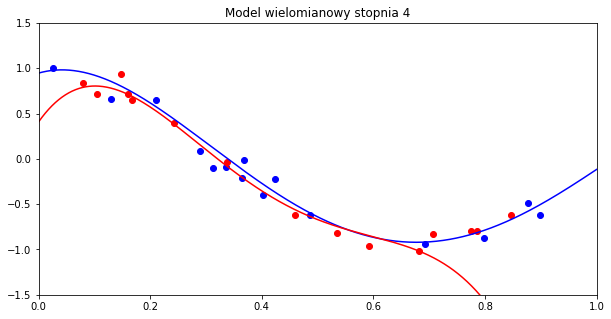

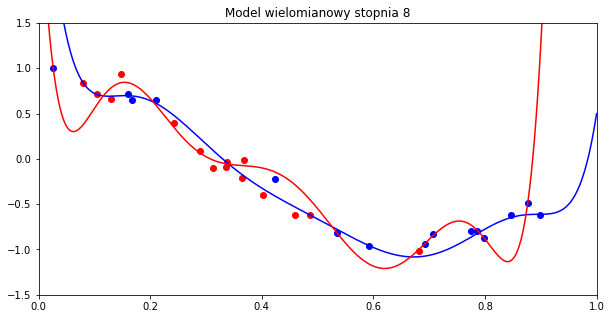

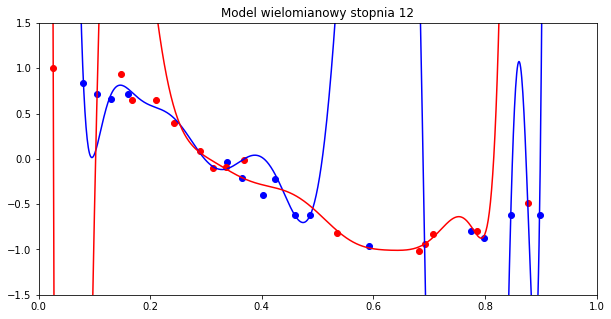

In [7]:
X_tr = np.vstack(np.linspace(0,1,1000))
for j in [1,4,8,12]:
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    plt.scatter(X_train, y_train,  color='blue')
    plt.scatter(X_test, y_test,  color='red')
    X, y = shuffle(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    model1 = make_pipeline(PolynomialFeatures(j), LinearRegression())
    model1.fit(X_train, y_train)
    ax.plot(X_tr, model1.predict(X_tr), 'b');
    
    model2 = make_pipeline(PolynomialFeatures(j), LinearRegression())
    model2.fit(X_test, y_test)
    ax.plot(X_tr, model2.predict(X_tr), 'r');
    if j == 1:
        ax.set_title('Model liniowy')
    else:    
        ax.set_title('Model wielomianowy stopnia ' +str(j))
    ax.set_xlim([0,1])
    ax.set_ylim([-1.5,1.5])
    plt.show()